In [39]:
Cancer <- read.csv('cancer.csv', header = T, as.is = T, row.names = 1)

# Death
Cancer$deathEst2015 <- Cancer$popEst2015/100000*Cancer$deathRate


In [ ]:
library(ggplot2)
library(repr)

#options(repr.plot.width=8, repr.plot.height=5)

## Utility Functions

In [40]:
# Combo Box & Histogram Plots with Normal Curve and Mean/Median Lines

boxHist <- function(v,name)
{
  vLen    <- length(v)
  vMin    <- min(v, na.rm = T)
  vMax    <- max(v, na.rm = T)
  vBreaks <- seq(vMin, vMax, length.out = 10)
  vMean   <- mean(v, na.rm = T)
  vMedian <- median(v, na.rm = T)
  vSD     <- sd(v)

  l <- layout(mat = matrix(c(1,2),2,1, byrow = T), height = c(1,8))
  p <- par(mar = c(0, 3.1, 1.1, 2.1))
  b <- boxplot(v, horizontal = T, xaxt = 'n', col ='#5E4FA2', frame = F)
  p <- par(mar=c(4, 3.1, 1.1, 2.1))
  h <- hist(v, col = c('#9E0142','#D53E4F','#F46D43','#FDAE61','#FEE08B','#FFFFBF','#E6F598','#ABDDA4','#66C2A5','#3288BD','#5E4FA2'),
            breaks = vBreaks,
            main = NA,
            xlab = name,
            labels = T )

  xFit <- seq(vMin, vMax, length.out = 100)
  yFit <- dnorm(xFit, mean = vMean, sd = vSD)
  yFit <- yFit * diff(h$mids[1:2]) * vLen
  
  x <- lines(xFit, yFit, col = 'darkblue', lwd = 3)
  x <- abline(v = vMean, col = 'red', lwd = 3, lty = 1)
  x <- abline(v = vMedian, col = 'red', lwd = 3, lty = 2)
}

dropOut <- function(v)
{
  return (v[!v %in% boxplot.stats(v)$out]) # drop values that are outside +/- 1.5 IQR
}

### Location
- Geography

### Age [Pri]
- MedianAge
- MedianAgeMale
- MedianAgeFemale

### Family [Pri]
- AvgHouseholdSize
- PctMarriedHouseholds
- PercentMarried
 
### Ethnicity [Pri]
- PctWhite
- PctBlack
- PctAsian
- PctOtherRace

### Education [Ramiro]
- PctNoHS18_24
- PctHS18_24
- PctSomeCol18_24
- PctBachDeg18_24
- PctHS25_Over
- PctBachDeg25_Over

### Employment [Pri]
- PctEmployed16_Over
- PctUnemployed16_Over

### Income [Payman]
- medIncome
- povertyPercent
- binnedInc

### Insurance [Payman]
- PctPrivateCoverage
- PctEmpPrivCoverage
- PctPublicCoverage

### Population
- popEst2015
- avgAnnCount
- BirthRate
- incidenceRate

### Outcome
- deathRate

0.5 % of the population develops cancer each year : median(Cancer$avgAnnCount/Cancer$popEst2015) * 100



# Analysis of Key Relationships

In this section we will explore how our outcome variable **deathEst2015** is releated to the other variables in our dataset. We will focus the analysis on the following aspects:
- Income
- Ethnicity
- Education
- Insurance
- Family
    - House Hold Size
    - Marital Status

### 3.1 Income

Exploring the median income and poverty variables with respect to deaths due to cancer we see a <TODO> correlation.

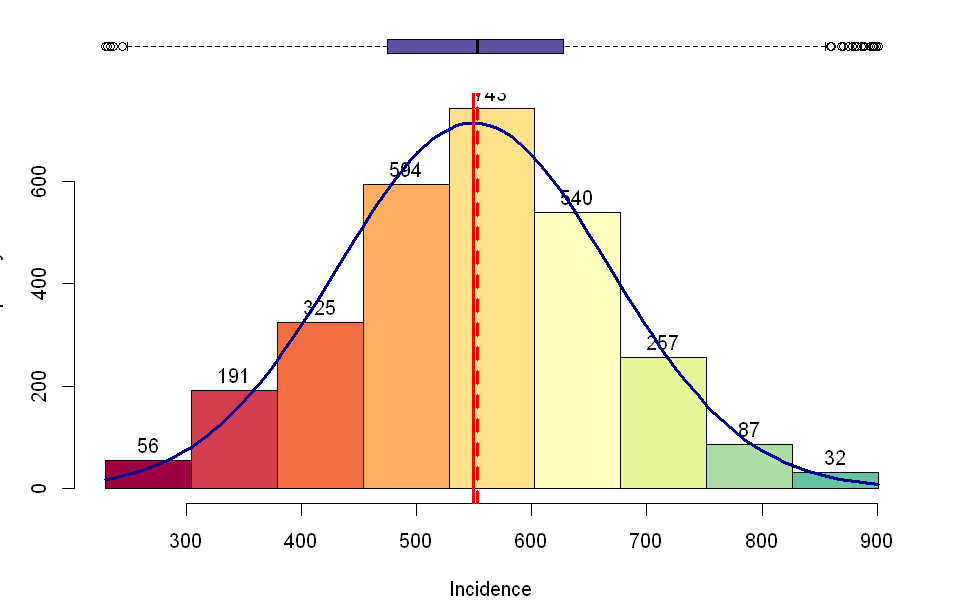

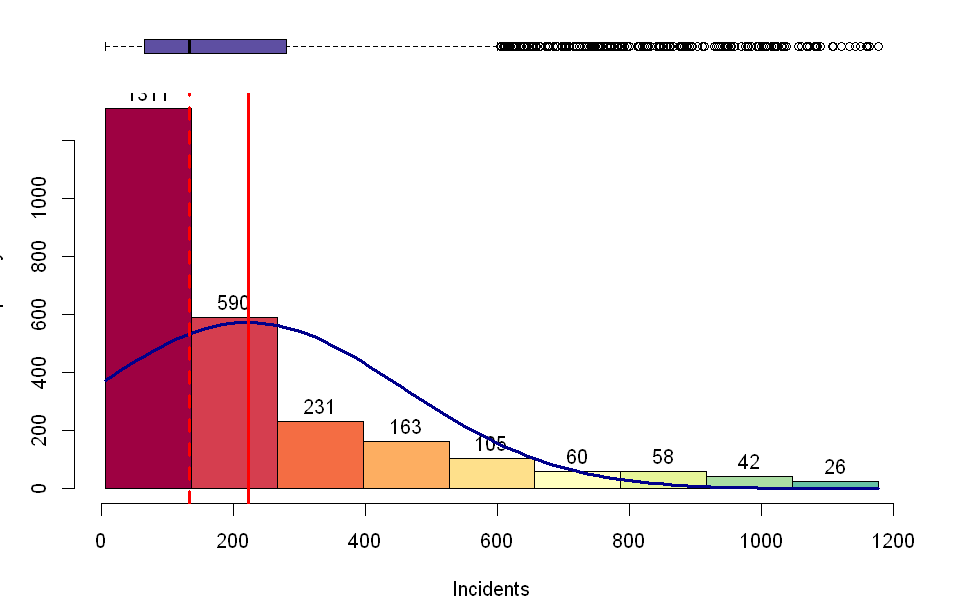

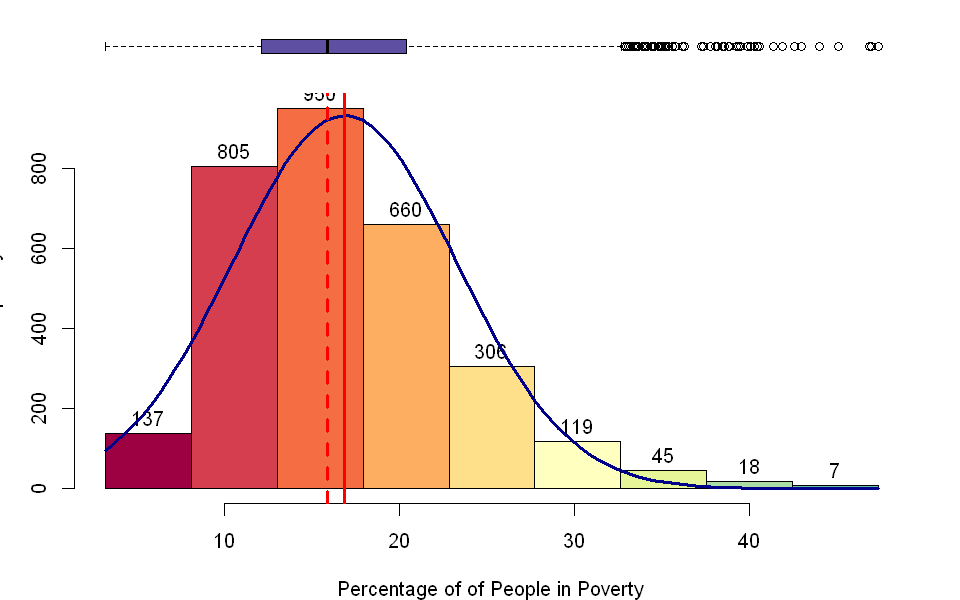

In [51]:
Cancer$incidenceRate <- Cancer$avgAnnCount/Cancer$popEst2015*100000
boxHist(dropOut(Cancer$incidenceRate), 'Incidence')

boxHist(dropOut(Cancer$avgAnnCount), 'Incidents')
boxHist(Cancer$povertyPercent, 'Percentage of of People in Poverty')

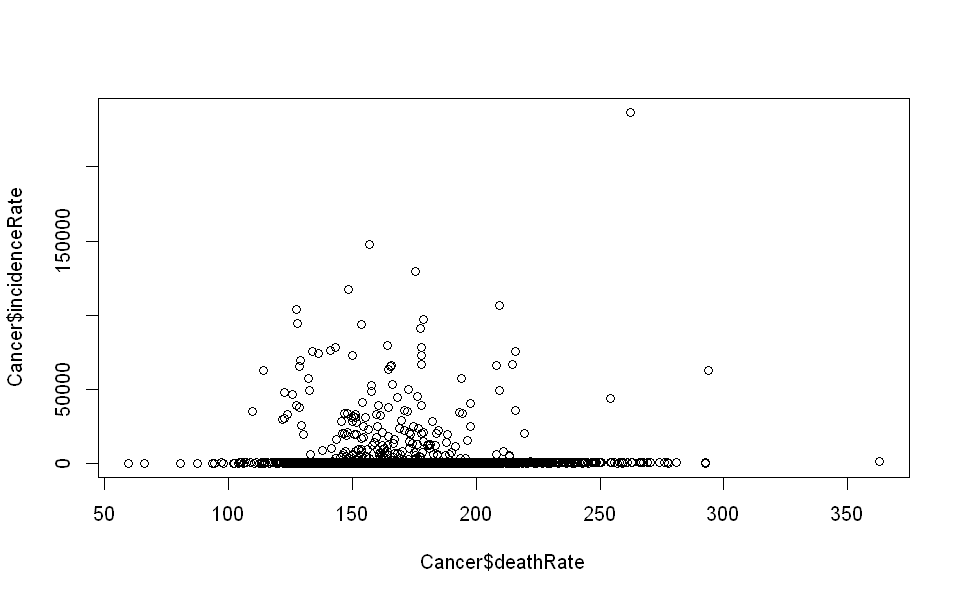

In [52]:

plot(Cancer$incidenceRate~Cancer$deathRate)


Cancer$deathsPerIncidence <- Cancer$deathRate / Cancer$incidenceRate